# Homework 04: Visualization, Correlation, and Linear Models

### The total score for this assignment will be 80 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [25]:
MY_UNIQNAME = 'xinyexu'

## Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

> YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

> This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- <b>Explain your answers in plain English. </b>

### Q1. For 15 Points: Compare the distributions of comments, views, likes, and dislikes

* Plot histograms for these metrics *for the US*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for the US*, as we did in this week's lab. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
US = pd.read_csv("./youtube-new/USvideos.csv")
CA = pd.read_csv("./youtube-new/CAvideos.csv")
GB = pd.read_csv("./youtube-new/GBvideos.csv")
DE = pd.read_csv("./youtube-new/DEvideos.csv")
FR = pd.read_csv("./youtube-new/FRvideos.csv")
print(US[['comment_count','views', 'likes', 'dislikes']].isnull().sum())

def plots_dist(comment_count, views, likes, dislikes):
    fig, axes = plt.subplots(2,2)
    fig.set_size_inches((22,8))
    sns.distplot(comment_count, ax=axes[0,0])
    sns.distplot(views, ax=axes[0,1])
    sns.distplot(likes, ax=axes[1,0])
    sns.distplot(dislikes, ax=axes[1,1])

def logdata(US):
    US_z = US[(US.comment_count != 0) & (US.views != 0) & (US.likes != 0) & (US.dislikes != 0)]
    US_z.loc[:,'log_comment_count'], US_z.loc[:,'log_views'] = [np.log(US_z.comment_count), np.log(US_z.views)]
    US_z.loc[:,'log_likes'], US_z.loc[:,'log_dislikes'] = [np.log(US_z.likes), np.log(US_z.dislikes)]
    US_log = US_z[['log_comment_count','log_views', 'log_likes', 'log_dislikes']]
    return (US_log)

US_log = logdata(US)               
print('US len:', len(US), 'US drop zero len:', len(US_log))

comment_count    0
views            0
likes            0
dislikes         0
dtype: int64
US len: 40949 US drop zero len: 40003


/anaconda2/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda2/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


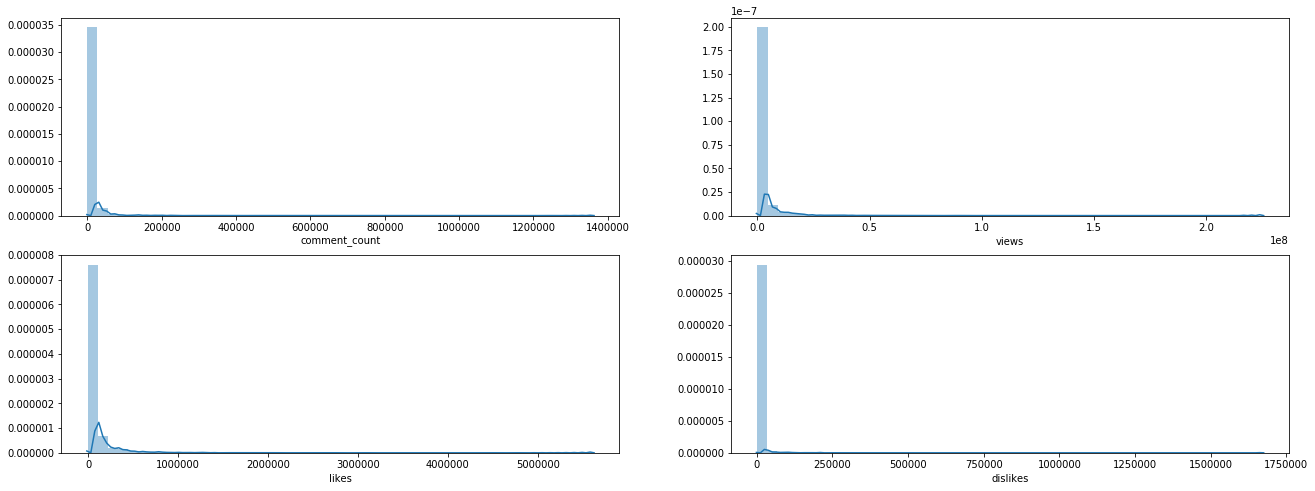

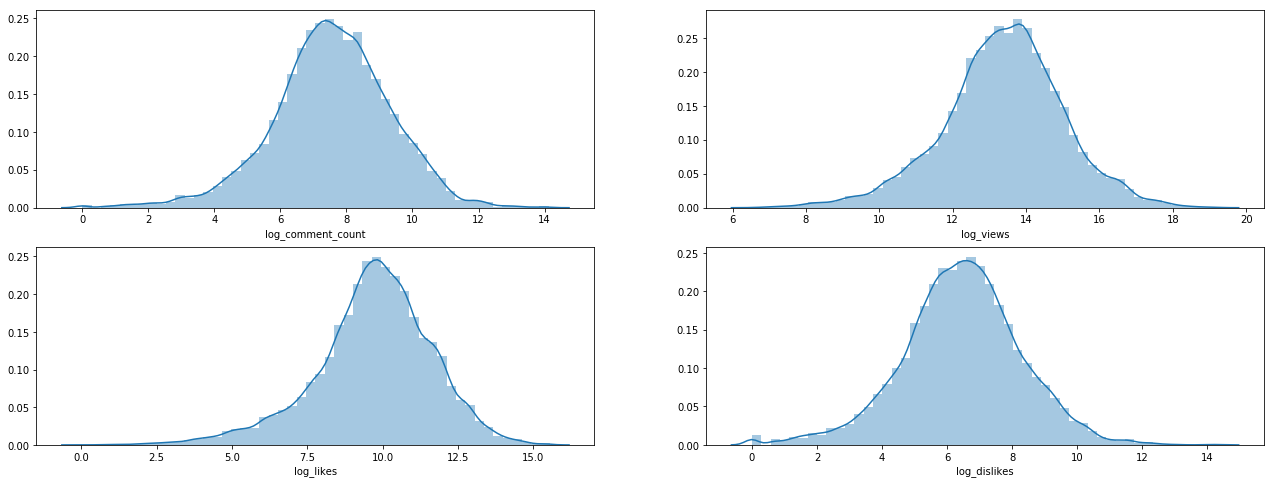

In [14]:
plots_dist(US.comment_count, US.views, US.likes, US.dislikes)
plots_dist(US_log.log_comment_count, US_log.log_views, US_log.log_likes, US_log.log_dislikes)

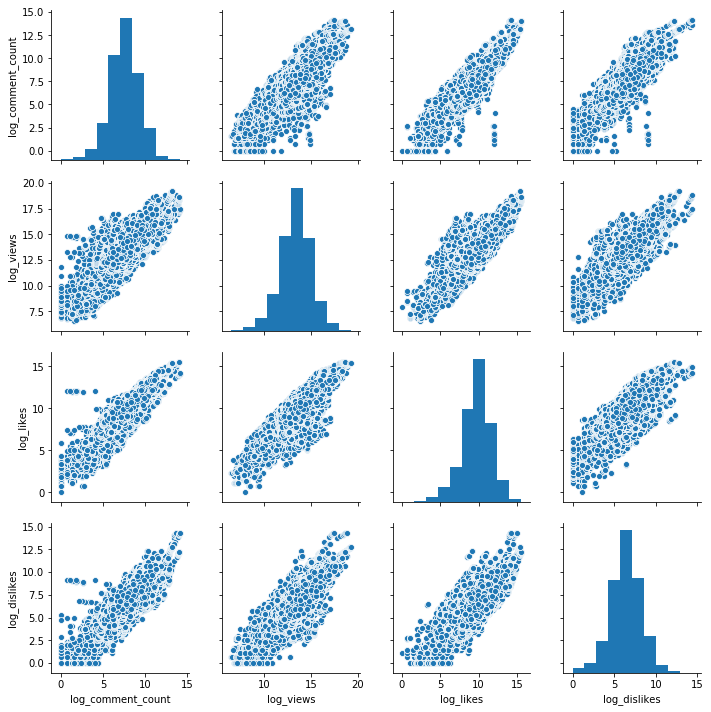

In [15]:
sns.pairplot(US_log) 

/anaconda2/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda2/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


US len: 40881 US drop zero len: 39924


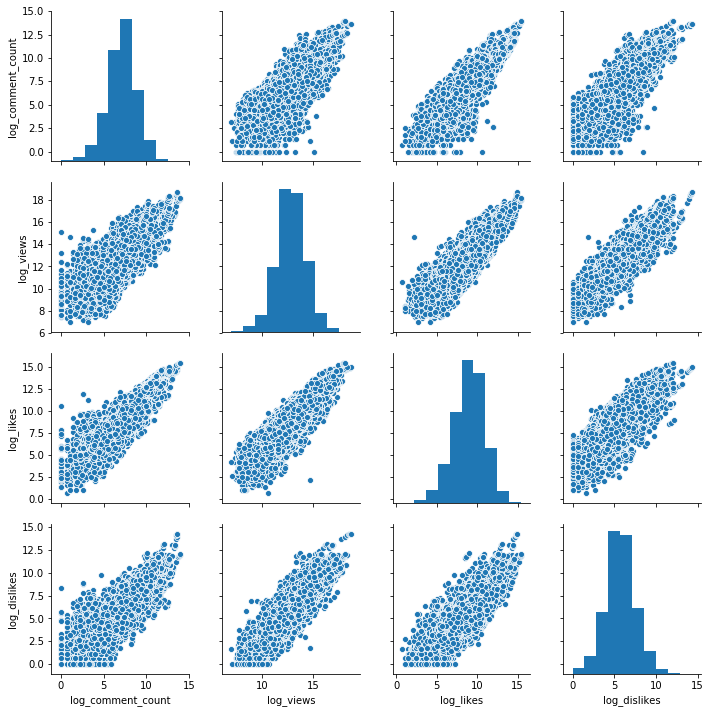

In [16]:
CA_log = logdata(CA)               
print('US len:', len(CA), 'US drop zero len:', len(CA_log))
sns.pairplot(CA_log) 

/anaconda2/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


GB len: 38916 GB drop zero len: 38060


/anaconda2/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


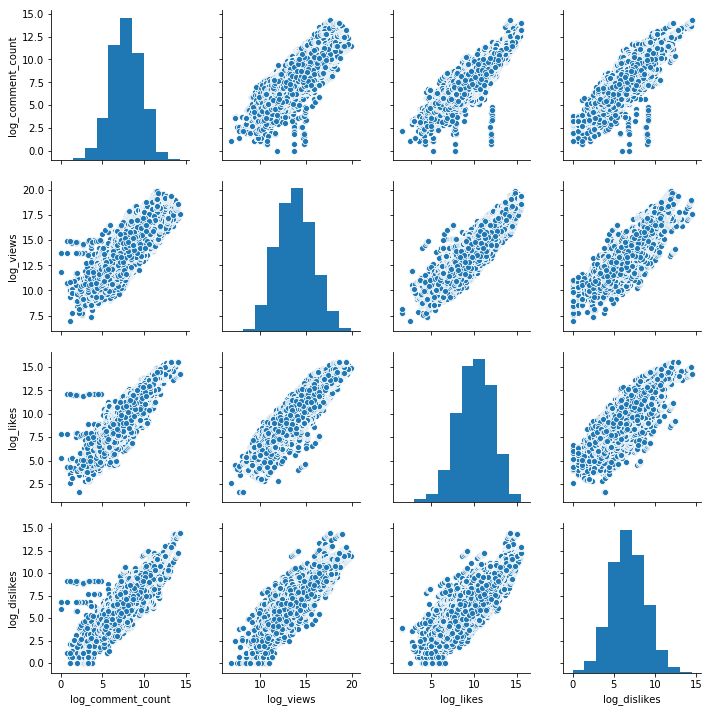

In [22]:
GB_log = logdata(GB)               
print('GB len:', len(GB), 'GB drop zero len:', len(GB_log))
sns.pairplot(GB_log) 

/anaconda2/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda2/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


DE len: 40840 DE drop zero len: 38891


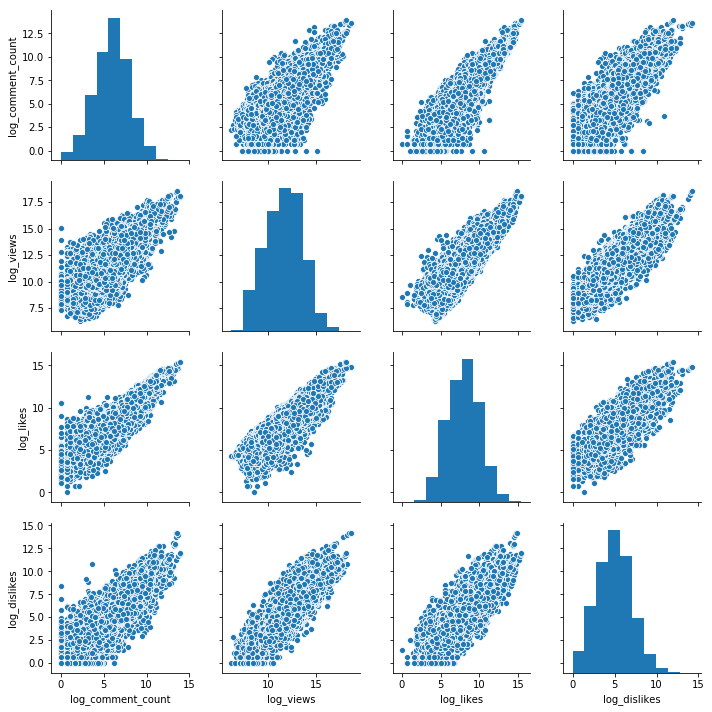

In [20]:
DE_log = logdata(DE)               
print('DE len:', len(DE), 'DE drop zero len:', len(DE_log))
sns.pairplot(DE_log) 

/anaconda2/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda2/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


FR len: 40724 FR drop zero len: 38698


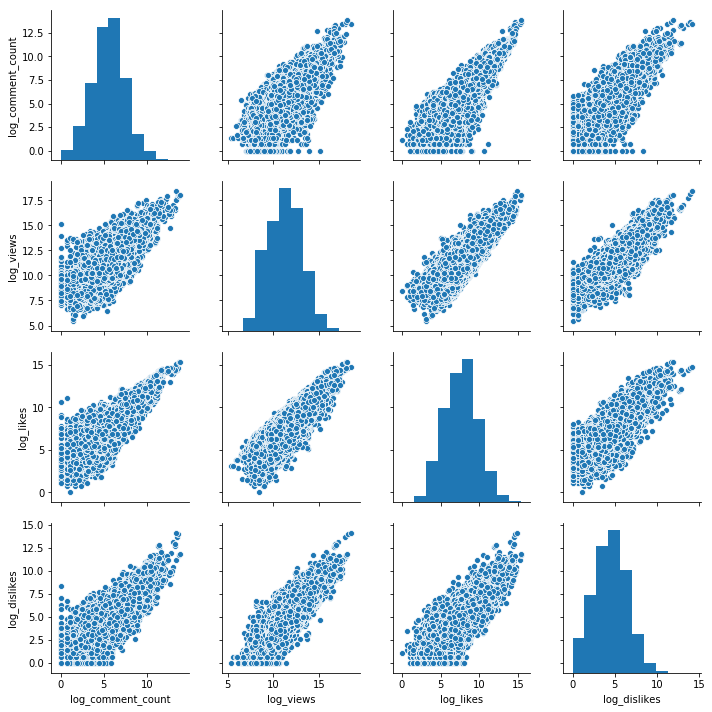

In [21]:
FR_log = logdata(FR)               
print('FR len:', len(FR), 'FR drop zero len:', len(FR_log))
sns.pairplot(FR_log) 

* Plot histograms for these originial values for the US. There is a huge range for all values. Most points are clustered in the left small area and there is a huge long tail in the right hand side, which means asymmetric.

* After applying a log transformation, histograms look more like a normal distribution with almost symmetric graph. 

* With pairplot for the US, views and Like seems to have a correlated relationship, which is superising. 

* With pairplots for other 4 countreis, they look pretty similar. They have simialr corrleatation for (comment, views), (views, like), (comment, like)


### Q2. For 10 Points: Create a heatmap of correlations between the variables for a region of your choice

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Are there any interesting correlations? What are they?

                   log_comment_count  log_views  log_likes  log_dislikes
log_comment_count           1.000000   0.845169   0.902182      0.871293
log_views                   0.845169   1.000000   0.883605      0.871051
log_likes                   0.902182   0.883605   1.000000      0.814281
log_dislikes                0.871293   0.871051   0.814281      1.000000


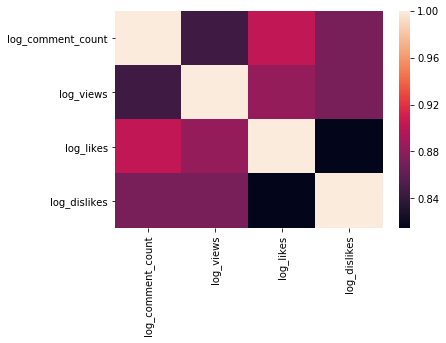

In [2]:
sns.heatmap(US_log.corr())
print(US_log.corr())

Similar to the pairsplot, comment views has lquite strong correlation with like and dislike. like and views are also correlated. Log data has a stronger correlated relationship.

### Q3. For 15 points: Create and compare OLS models using variables of your choice, for a region of your choice
* select two variables (remember to filter for the region of your choice)
* use the JointGrid approach from our in-class session to visualize the relationship between the variables
* use `statsmodels` to create a regression model
* explain the how the results of the regression analysis help you understand the plot (and vice versa)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_likes   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                 1.750e+05
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:41:36   Log-Likelihood:                -49758.
No. Observations:               40003   AIC:                         9.952e+04
Df Residuals:                   40001   BIC:                         9.954e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.2836      0.018    125.386      0.000       2.248       2.319
log_comment_count     0.9827      0.002    418.305      0.000       0.978       0.987
==============================================================================
Omnibus:                     6001.525   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23733.868
Skew:                          -0.710   Prob(JB):                         0.00
Kurtosis:                       6.496   Cond. No.                         34.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

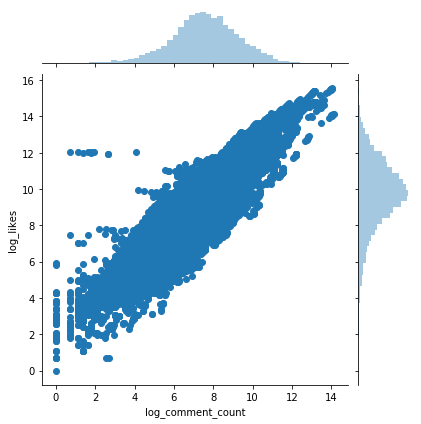

In [26]:
sns.jointplot(x='log_comment_count',y='log_likes',data=US_log)
import statsmodels.api as sm
import statsmodels.formula.api as smf
model1 = smf.ols('log_likes ~ log_comment_count', data=US_log).fit()
model1.summary()

From the jointplot, we can clearly notice a linear trned between these two variables. From the p-value of the coefficent is less than 0.05, which indicates a siginificant non-zero coefficient. Therefore, the statistical test also follows the conclusion we made based on the jointplot.

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)*
- This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

### Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.).

* Which pairs have the most/least correlation coefficients?

                  HP    Attack   Defense   Sp. Atk   Sp. Def     Speed  \
HP          1.000000  0.422386  0.239622  0.362380  0.378718  0.175952   
Attack      0.422386  1.000000  0.438687  0.396362  0.263990  0.381240   
Defense     0.239622  0.438687  1.000000  0.223549  0.510747  0.015227   
Sp. Atk     0.362380  0.396362  0.223549  1.000000  0.506121  0.473018   
Sp. Def     0.378718  0.263990  0.510747  0.506121  1.000000  0.259133   
Speed       0.175952  0.381240  0.015227  0.473018  0.259133  1.000000   
Generation  0.058683  0.051451  0.042419  0.036437  0.028486 -0.023121   

            Generation  
HP            0.058683  
Attack        0.051451  
Defense       0.042419  
Sp. Atk       0.036437  
Sp. Def       0.028486  
Speed        -0.023121  
Generation    1.000000  


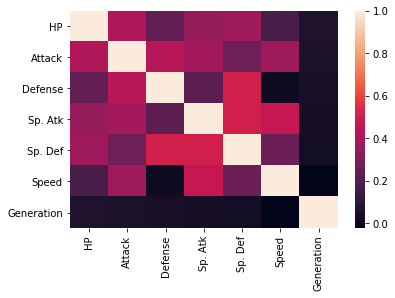

In [5]:
Pokemon = pd.read_csv("./Pokemon.csv")
Pokemon_df = Pokemon.iloc[:, 5:12]
print(Pokemon_df.corr())
sns.heatmap(Pokemon_df.corr())

Sp. Atk and Defense has the strongest realionship with corr = 0.510747. Speed and Generation has the strongest realionship with corr = -0.023121. 

### Q5. For 15 Points: Plot the distribution of ability points per Pokémon type

* How would you describe each Pokémon type with different ability points?

{'Fire', 'Fairy', 'Ghost', 'Fighting', 'Ground', 'Dragon', 'Psychic', 'Rock', 'Dark', 'Flying', 'Electric', 'Steel', 'Ice', 'Water', 'Normal', 'Bug', 'Poison', 'Grass'}
{nan, 'Fire', 'Fairy', 'Fighting', 'Ground', 'Dragon', 'Psychic', 'Rock', 'Dark', 'Flying', 'Steel', 'Bug', 'Ice', 'Water', 'Grass', 'Normal', 'Electric', 'Ghost', 'Poison'}
18


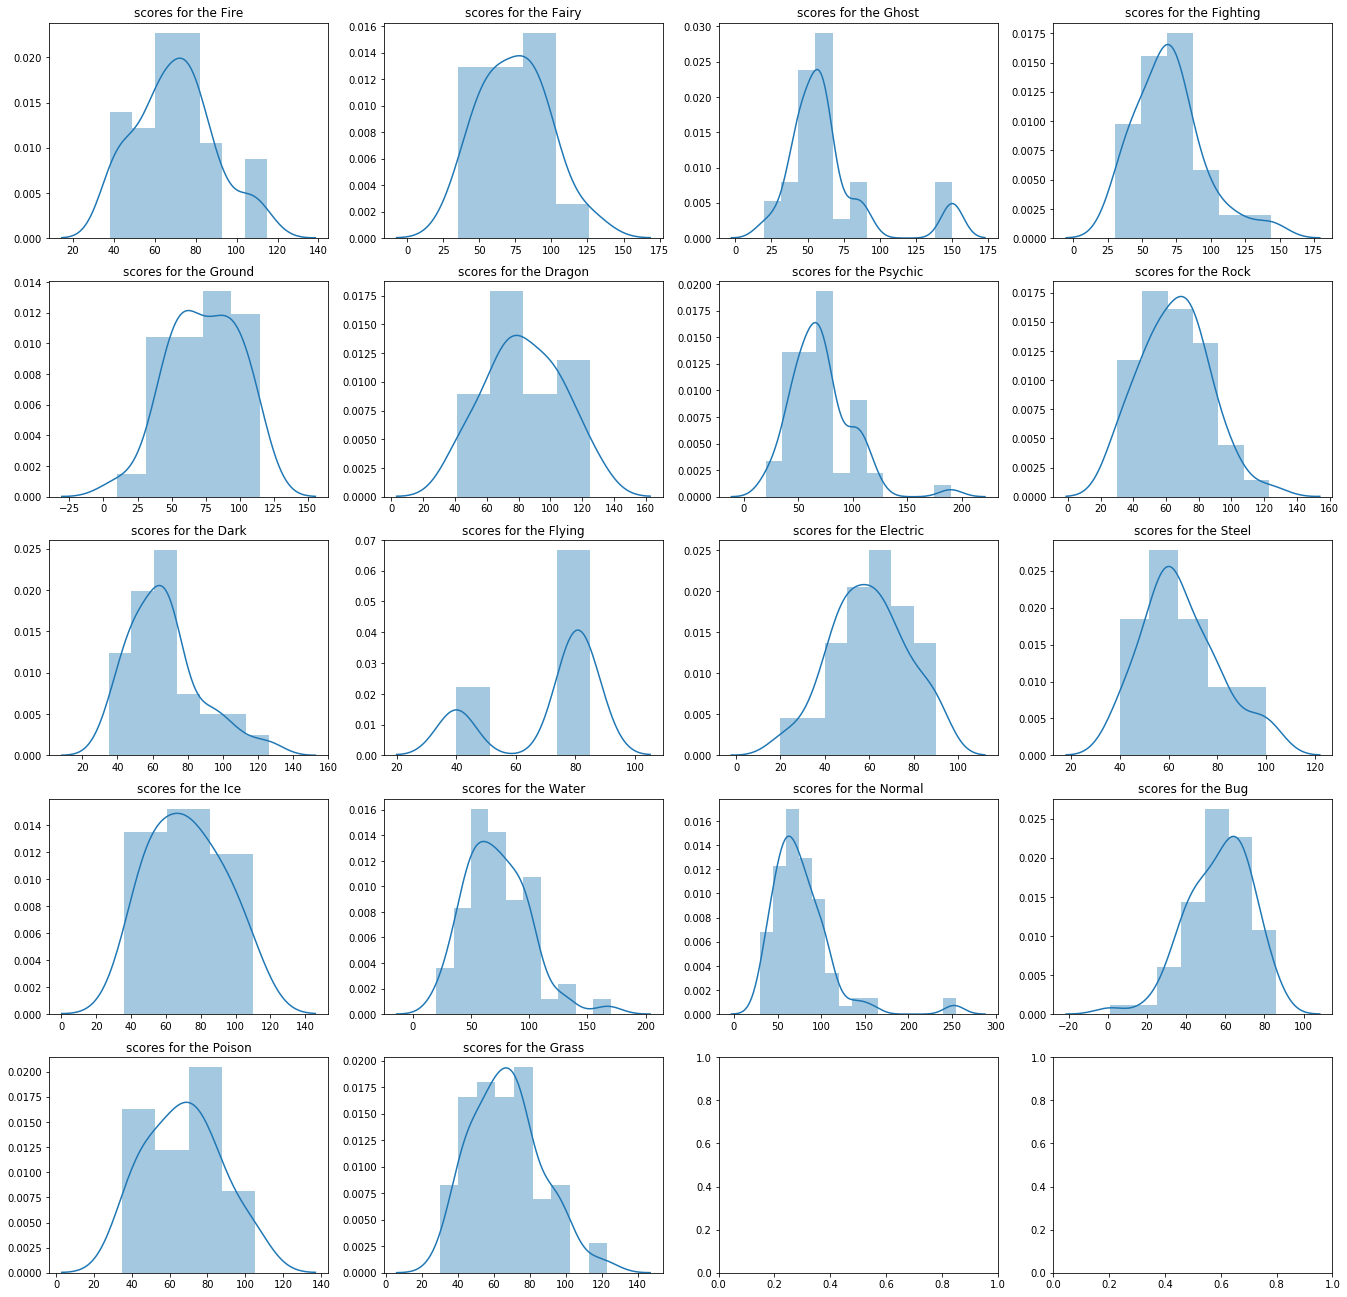

In [19]:
print(set(Pokemon['Type 1']))
print(set(Pokemon['Type 2']))
print(len(set(Pokemon['Type 1'])))

ability = ['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

def find_dis(df, plot_ncol, abil):
    for i, name in enumerate(set(df)): 
        Pokemon_sub = Pokemon[df == name][[abil]]
        row = max(i//plot_ncol, 0)
        col = max(i % plot_ncol, 0)
        sns.distplot(Pokemon_sub, ax = axes[row, col]).set_title("scores for the " + str(name))
        
fig, axes = plt.subplots(5,4)
fig.set_size_inches((23,23))    
find_dis(Pokemon['Type 1'], 4, ability[0])

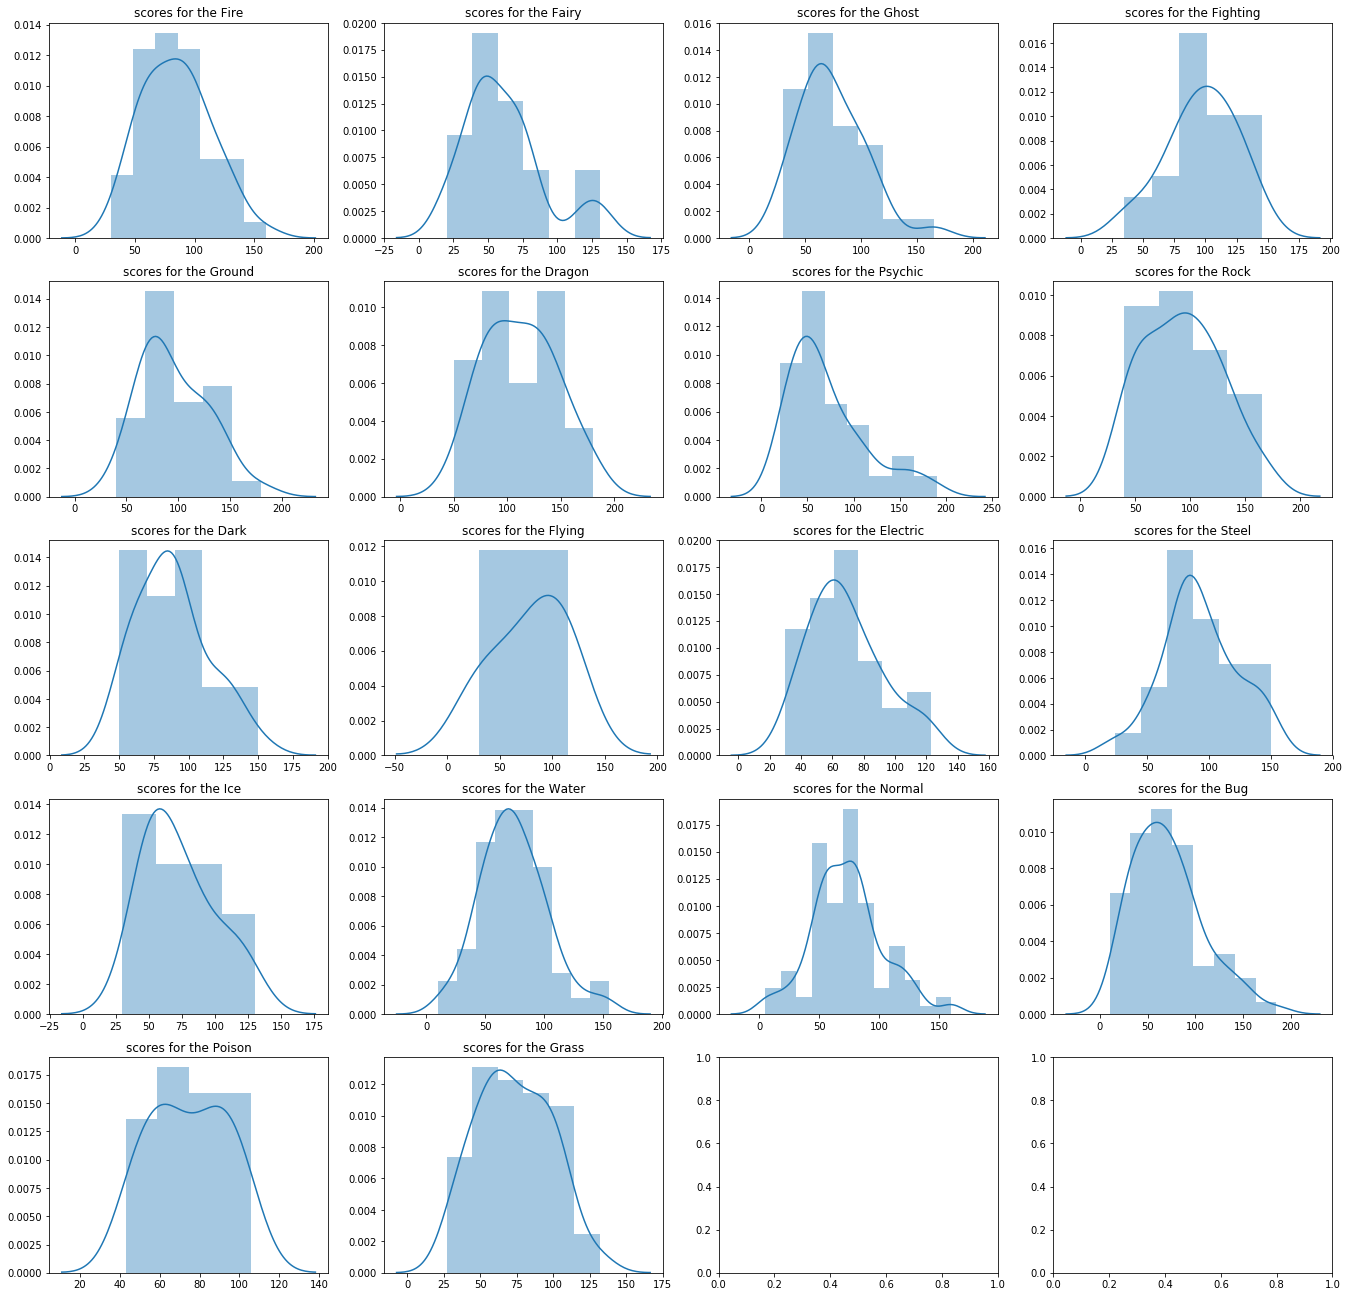

In [20]:
fig, axes = plt.subplots(5,4)
fig.set_size_inches((23,23))    
find_dis(Pokemon['Type 1'], 4, ability[1])

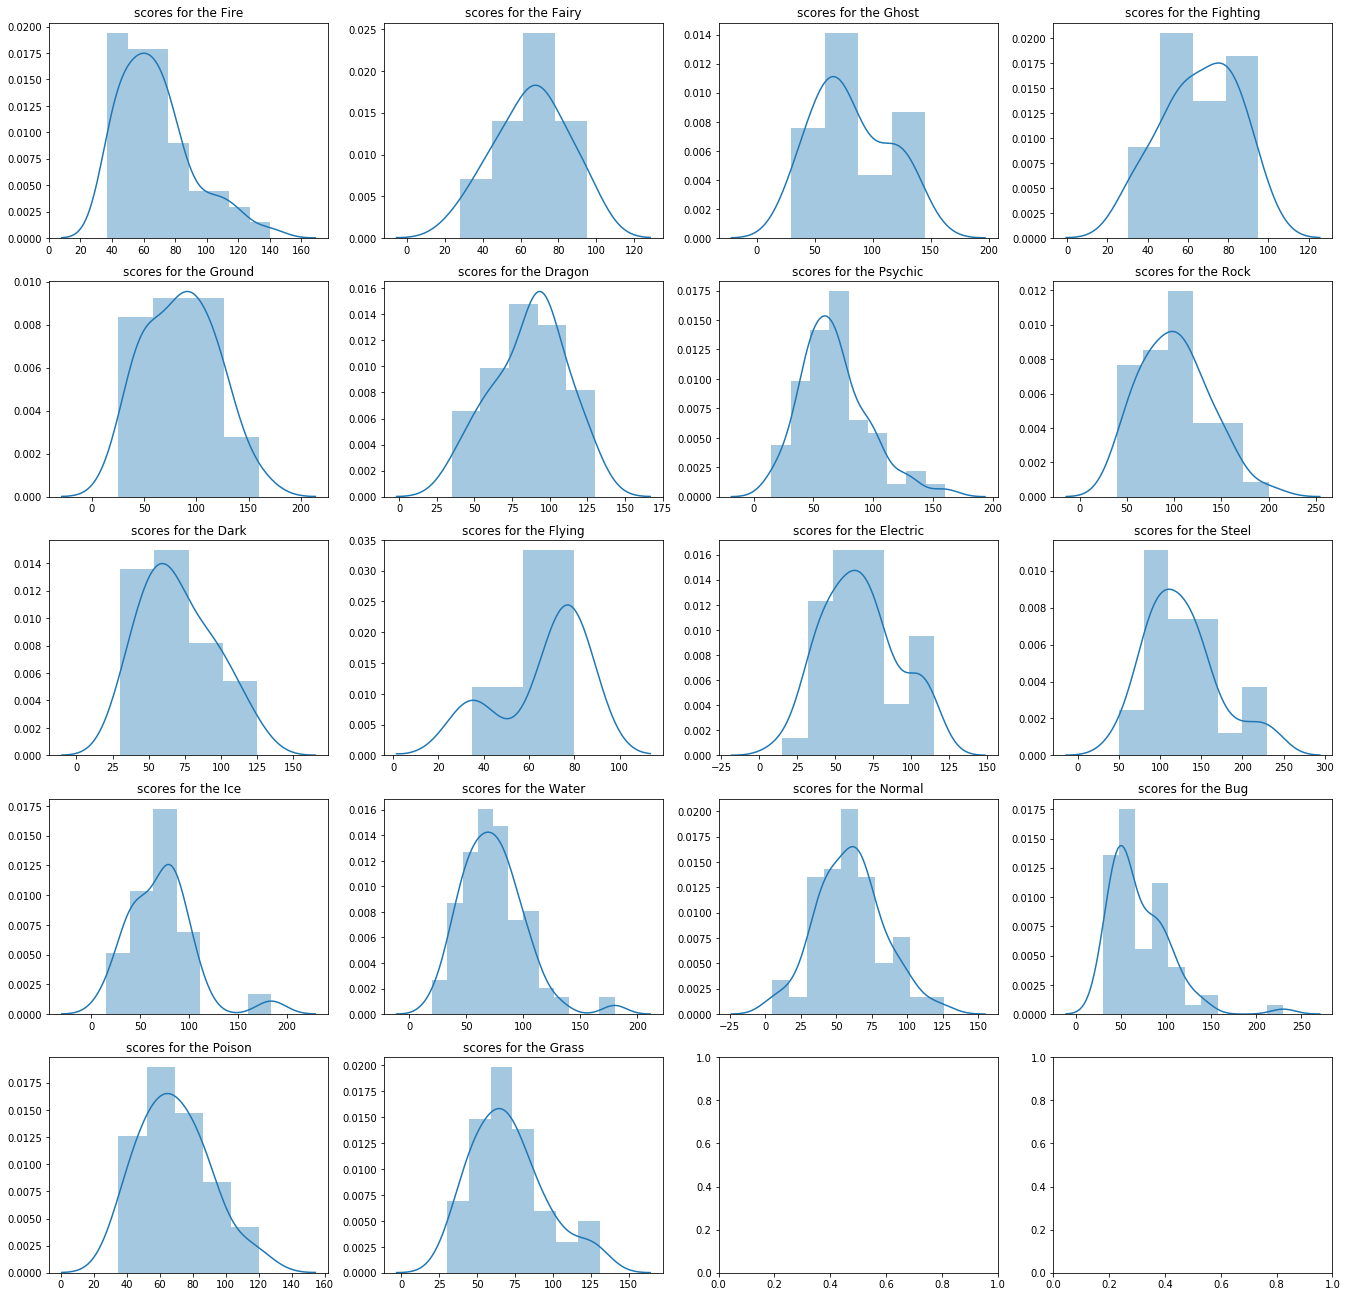

In [21]:
fig, axes = plt.subplots(5,4)
fig.set_size_inches((23,23))    
find_dis(Pokemon['Type 1'], 4, ability[2])

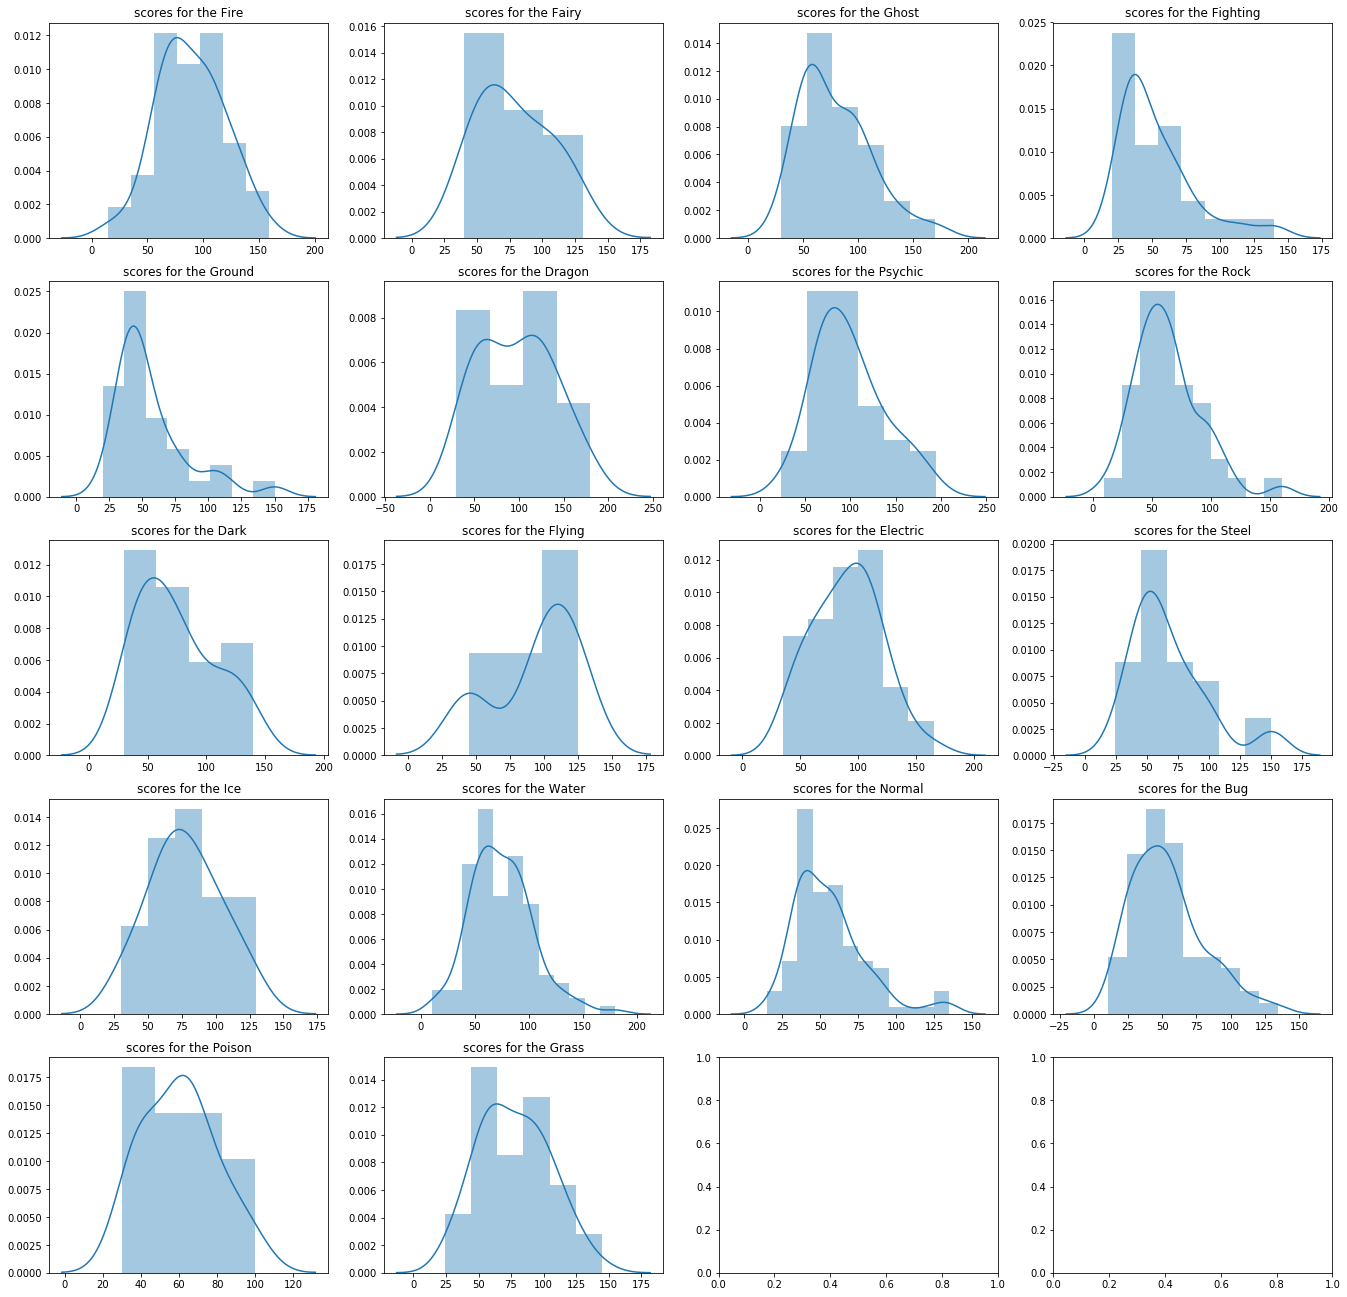

In [22]:
fig, axes = plt.subplots(5,4)
fig.set_size_inches((23,23))    
find_dis(Pokemon['Type 1'], 4, ability[3])

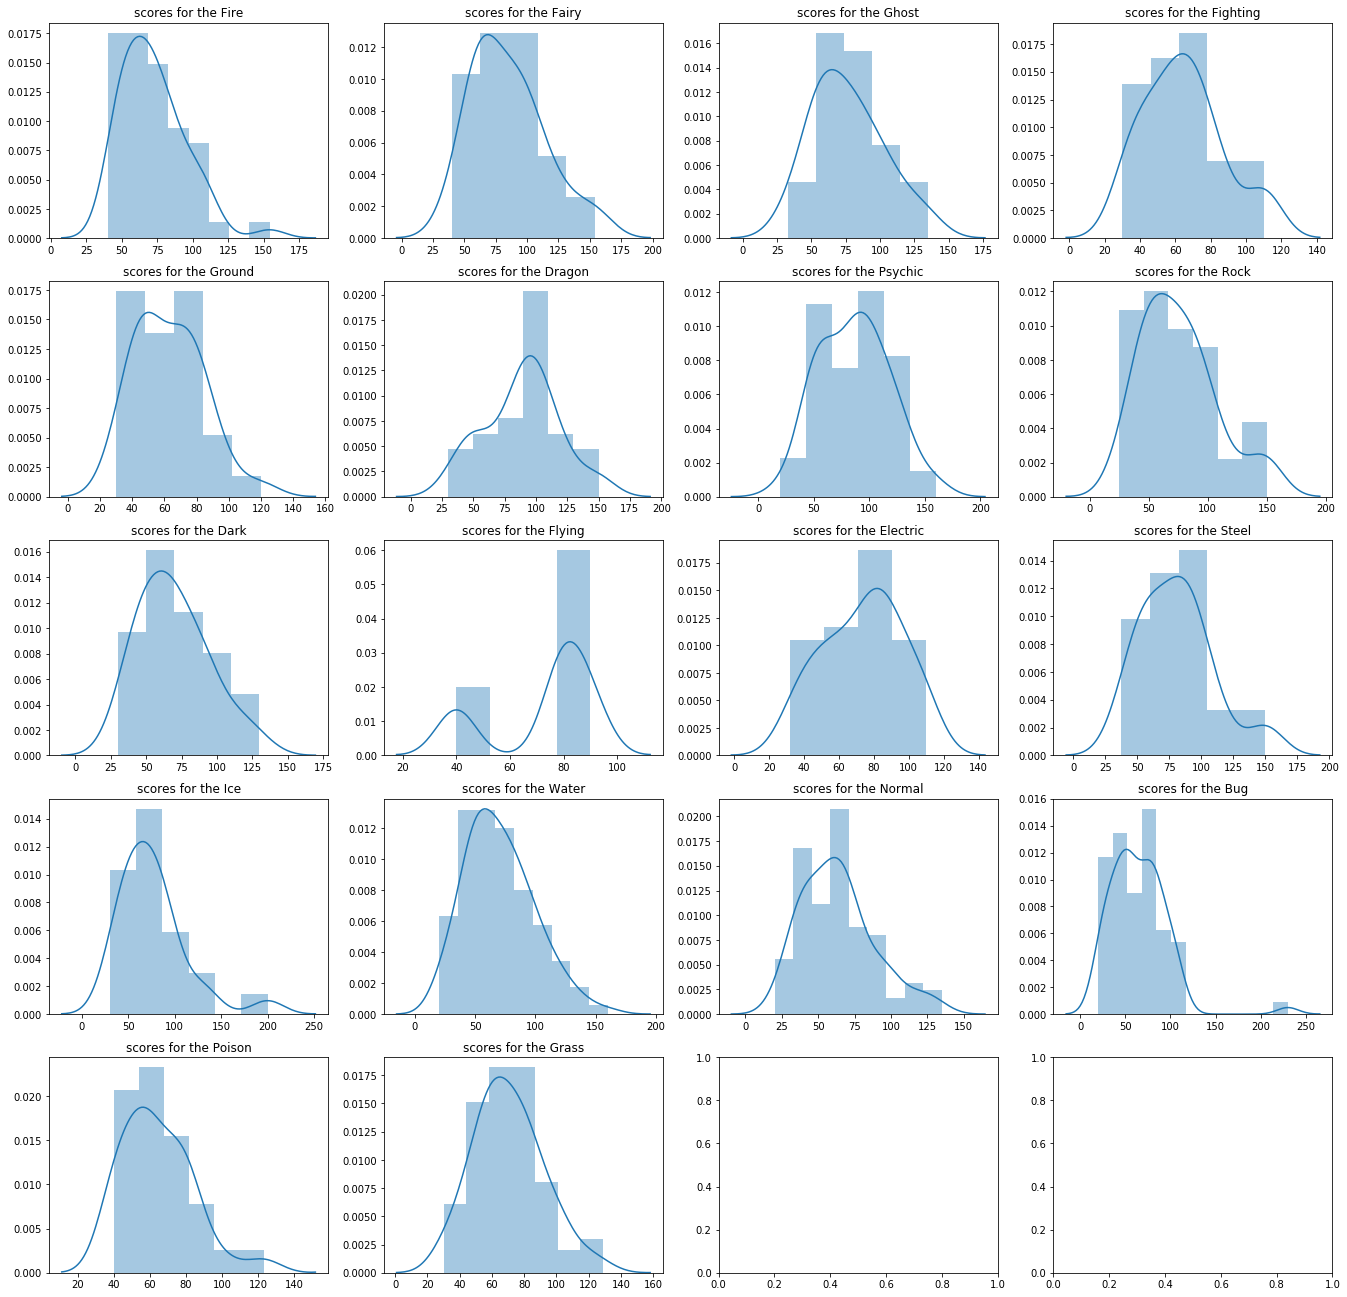

In [23]:
fig, axes = plt.subplots(5,4)
fig.set_size_inches((23,23))    
find_dis(Pokemon['Type 1'], 4, ability[4])

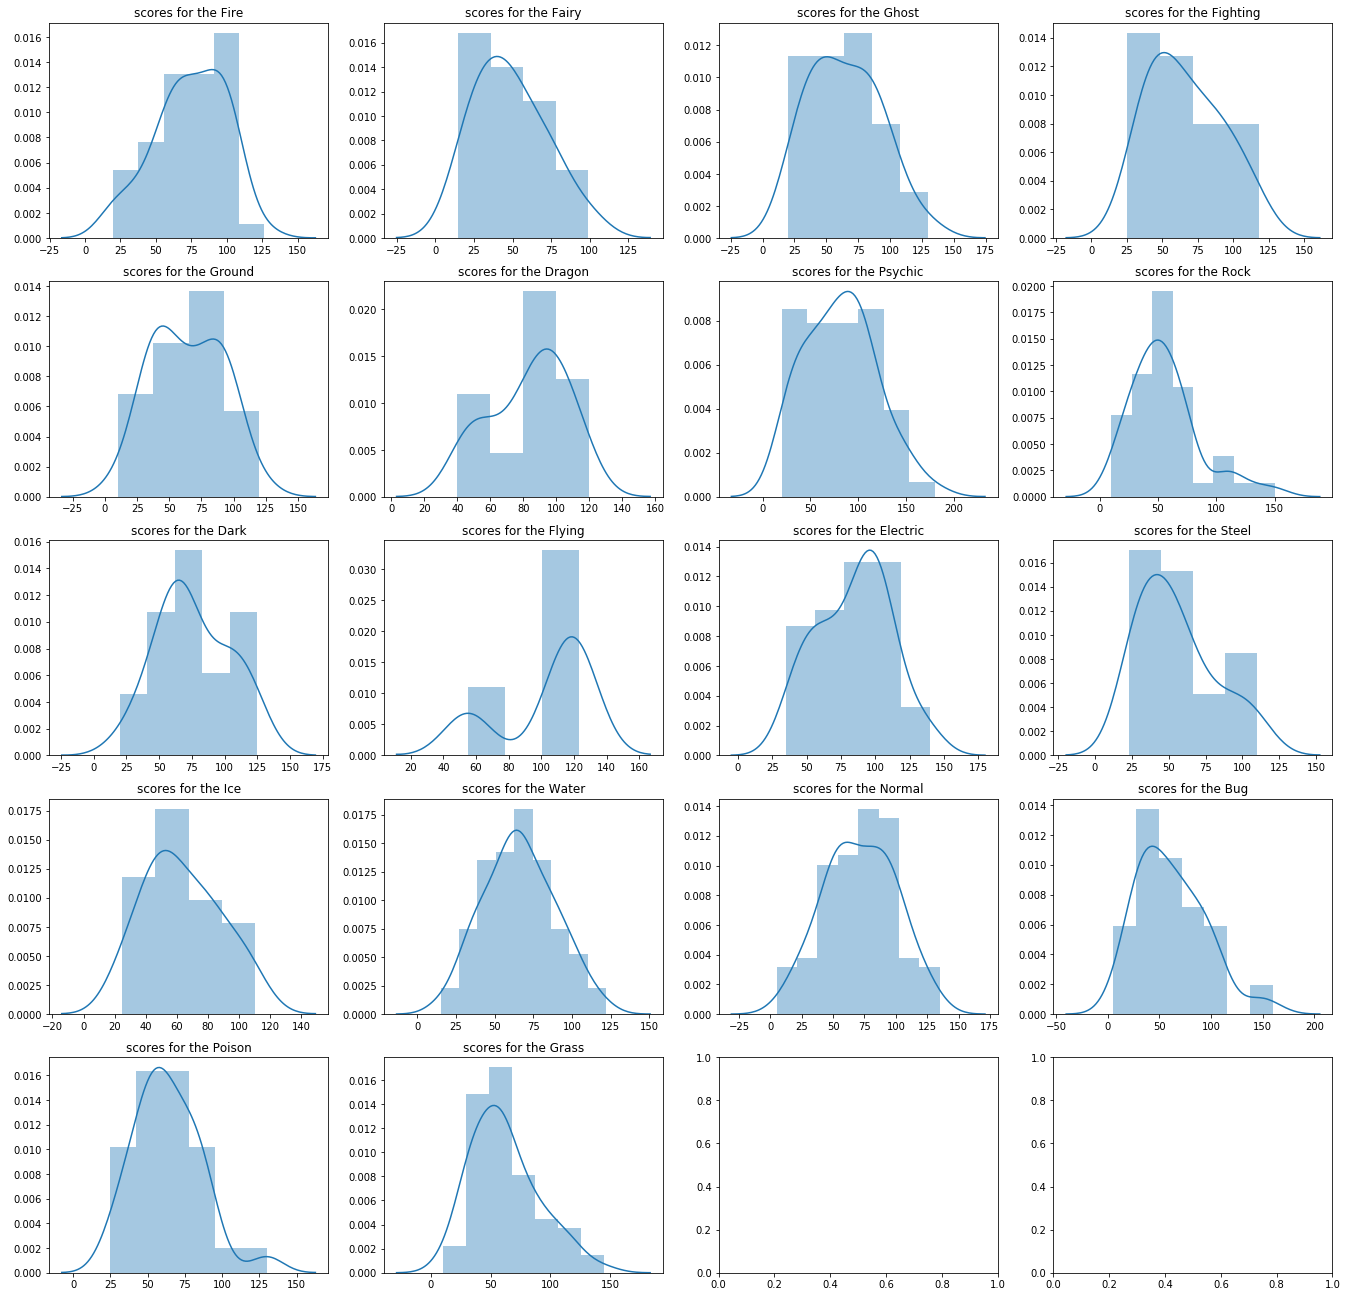

In [24]:
fig, axes = plt.subplots(5,4)
fig.set_size_inches((23,23))    
find_dis(Pokemon['Type 1'], 4, ability[5])

From the set, we know that Type i and Type 2 are almost the same expect for the NA in Type 2. Then we use Type 1, and the Grass type has more obvious trend as normal distribution in its 6 type of abilities. For most types, they have different abilities distribution for each abilities, most distribution are symmetric and some has a drop in the middle.

### Q6. For 15 Points: Explore how the Pokémon in each generation differ from each other?

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

{1, 2, 3, 4, 5, 6}


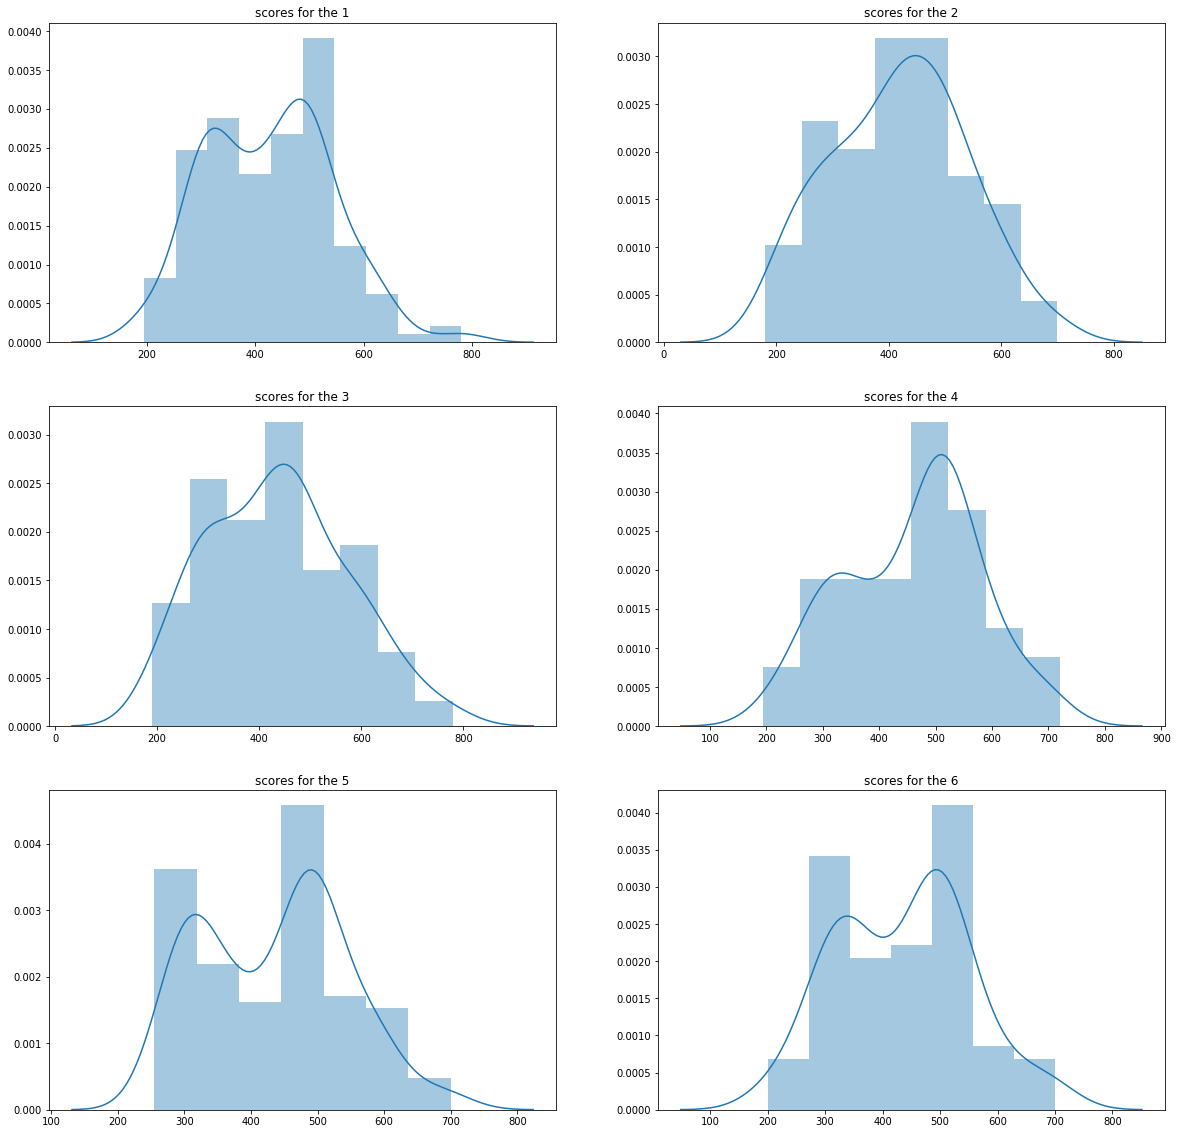

In [26]:
print(set(Pokemon.Generation))
fig, axes = plt.subplots(3,2)
fig.set_size_inches((20,20))
find_dis(Pokemon.Generation, 2, 'Total')

Text(0.5, 1.0, 'HP')

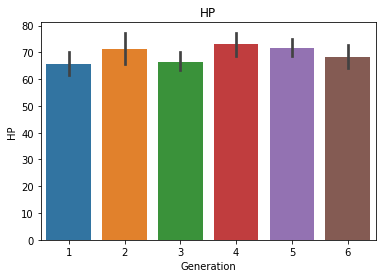

In [45]:
sns.barplot('Generation',ability[0],data=Pokemon).set_title(ability[0])

Text(0.5, 1.0, 'Attack')

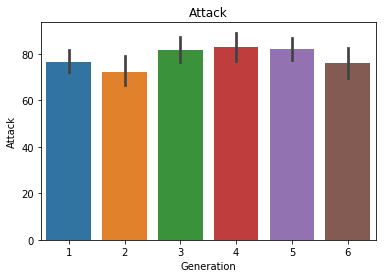

In [46]:
sns.barplot('Generation',ability[1],data=Pokemon).set_title(ability[1])

Text(0.5, 1.0, 'Defense')

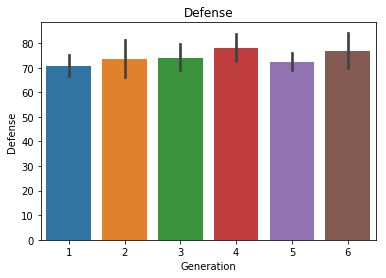

In [47]:
sns.barplot('Generation',ability[2],data=Pokemon).set_title(ability[2])

Text(0.5, 1.0, 'Sp. Atk')

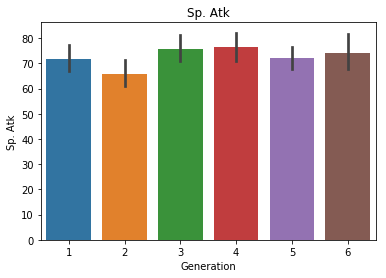

In [48]:
sns.barplot('Generation',ability[3],data=Pokemon).set_title(ability[3])

Text(0.5, 1.0, 'Sp. Def')

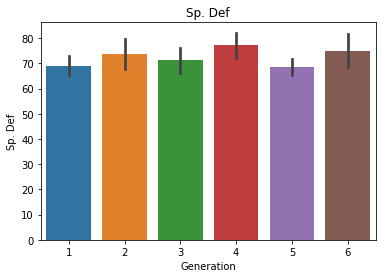

In [49]:
sns.barplot('Generation',ability[4],data=Pokemon).set_title(ability[4])

Text(0.5, 1.0, 'Speed')

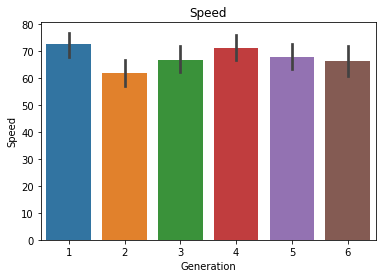

In [50]:
sns.barplot('Generation',ability[5],data=Pokemon).set_title(ability[5])

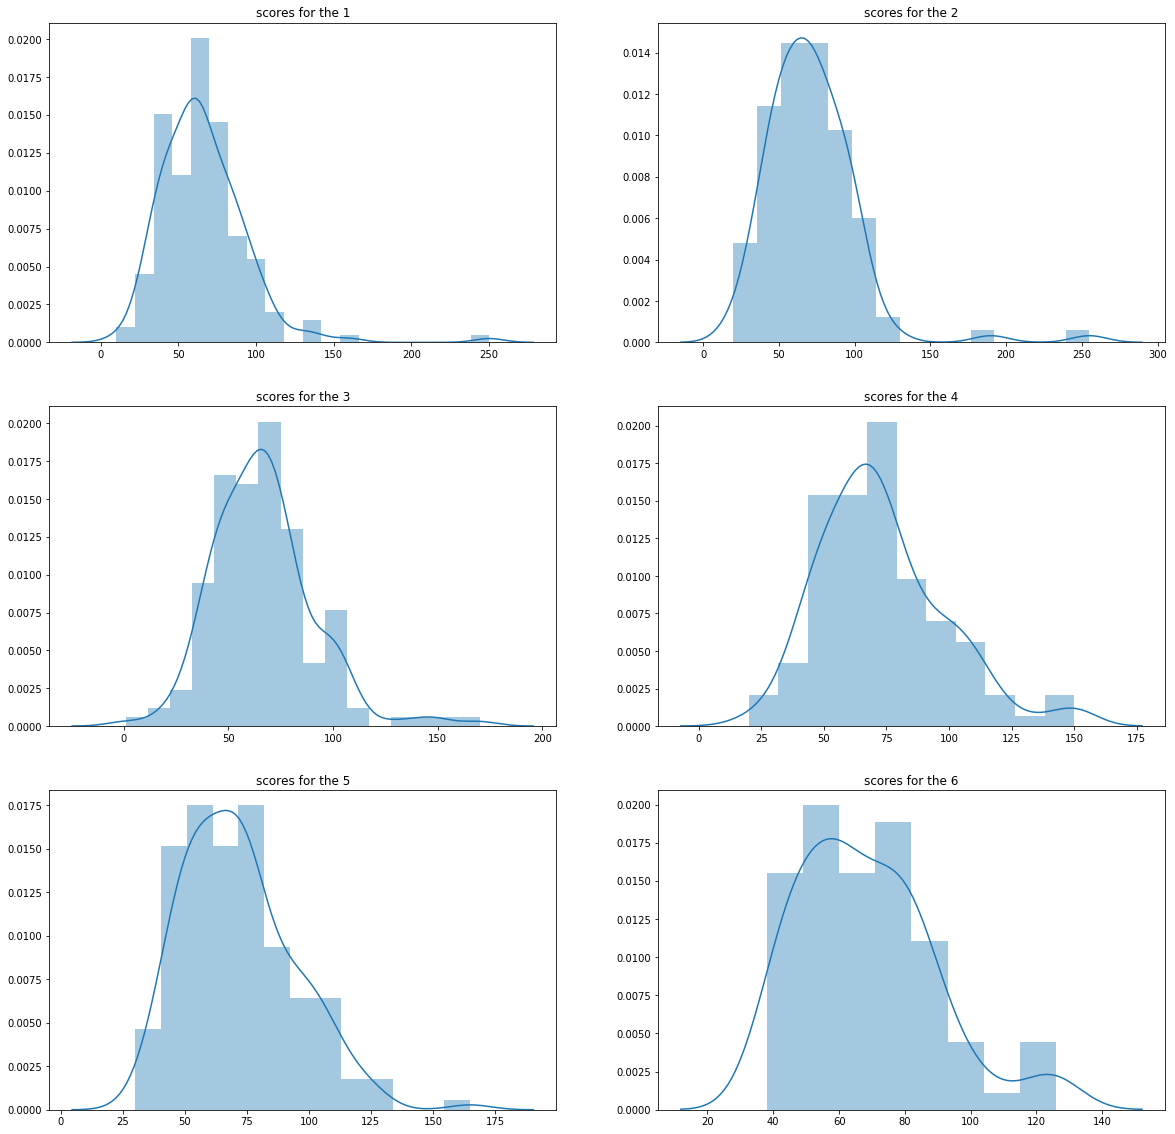

In [52]:
fig, axes = plt.subplots(3,2)
fig.set_size_inches((20,20))
find_dis(Pokemon.Generation, 2, ability[0])

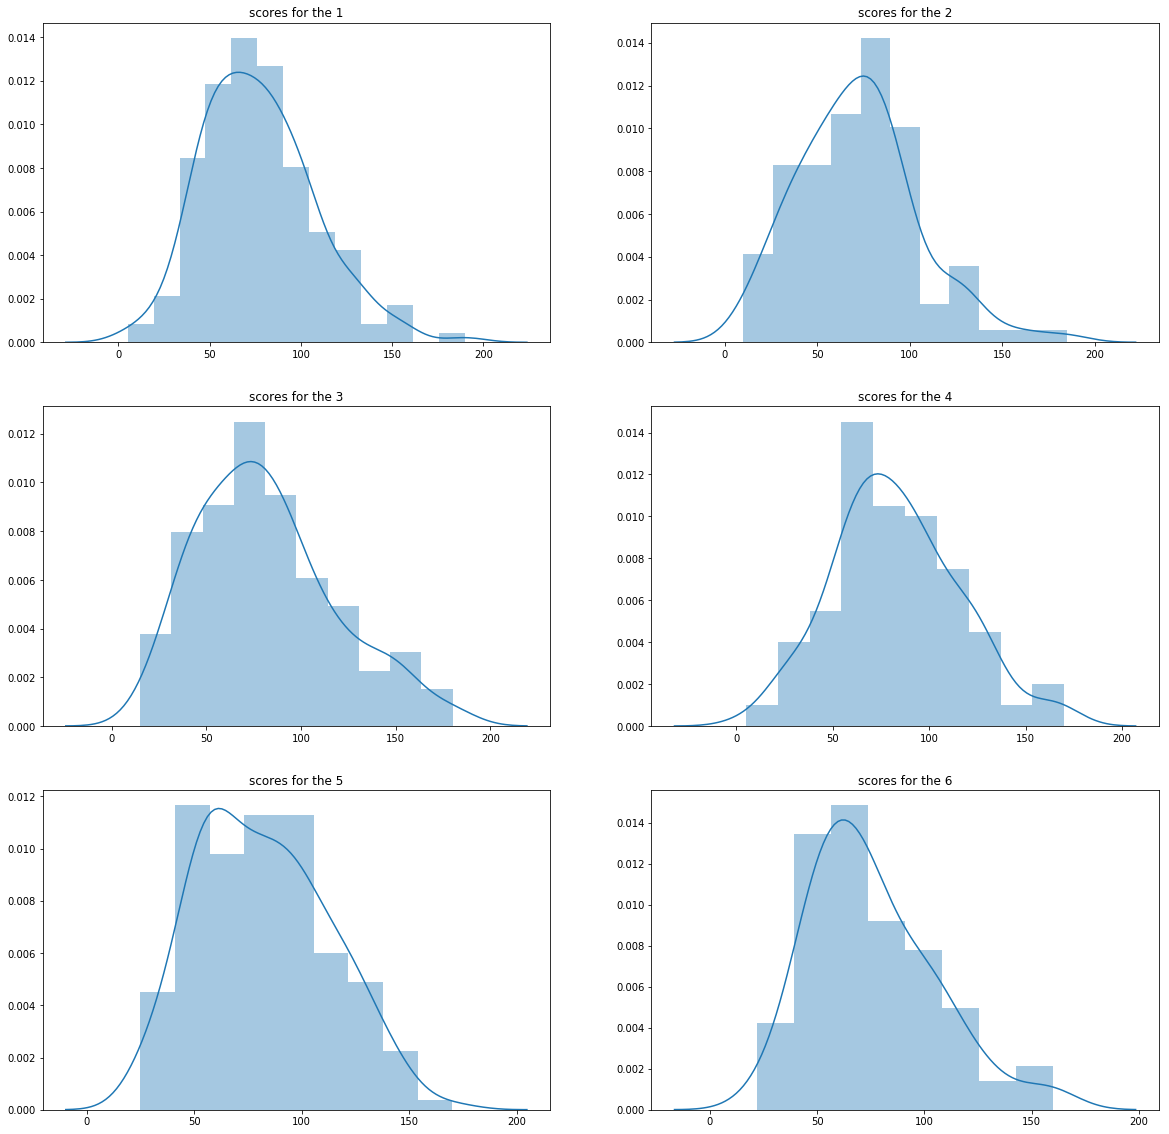

In [53]:
fig, axes = plt.subplots(3,2)
fig.set_size_inches((20,20))
find_dis(Pokemon.Generation, 2, ability[1])

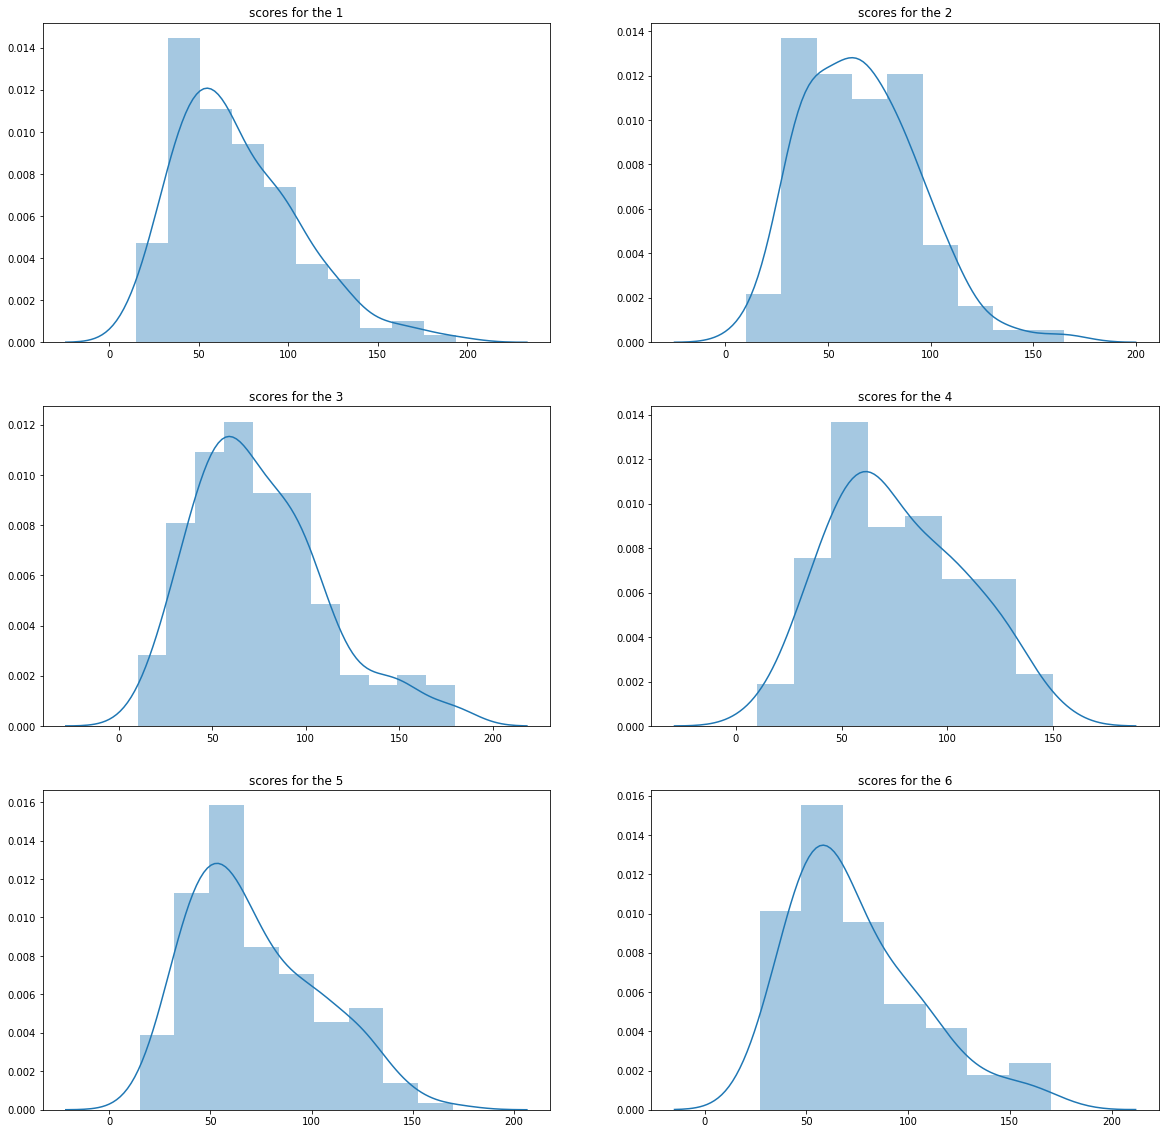

In [54]:
fig, axes = plt.subplots(3,2)
fig.set_size_inches((20,20))
find_dis(Pokemon.Generation, 2, ability[3])

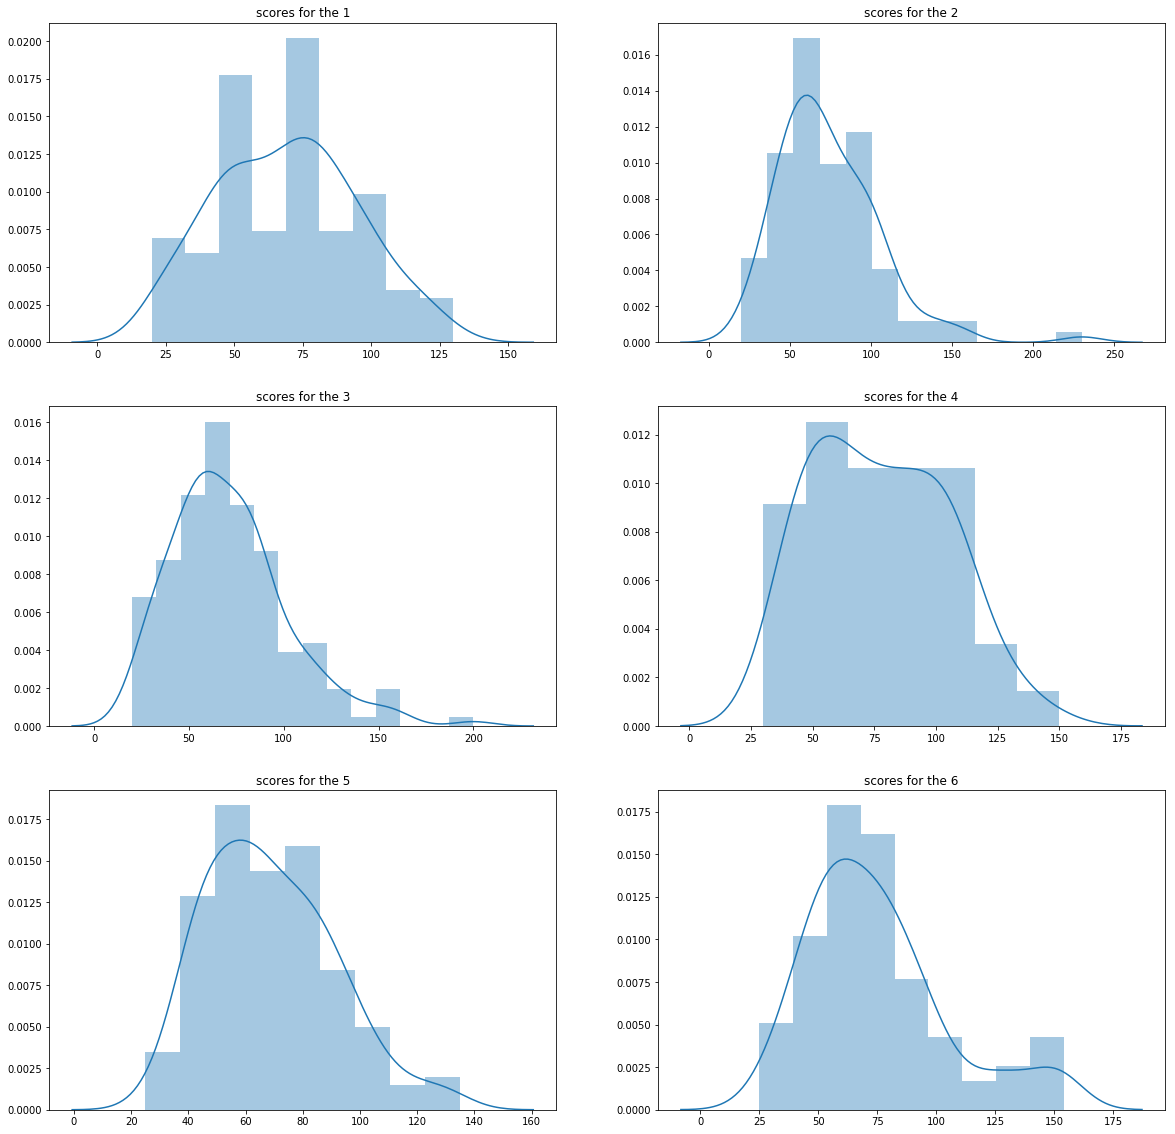

In [55]:
fig, axes = plt.subplots(3,2)
fig.set_size_inches((20,20))
find_dis(Pokemon.Generation, 2, ability[4])

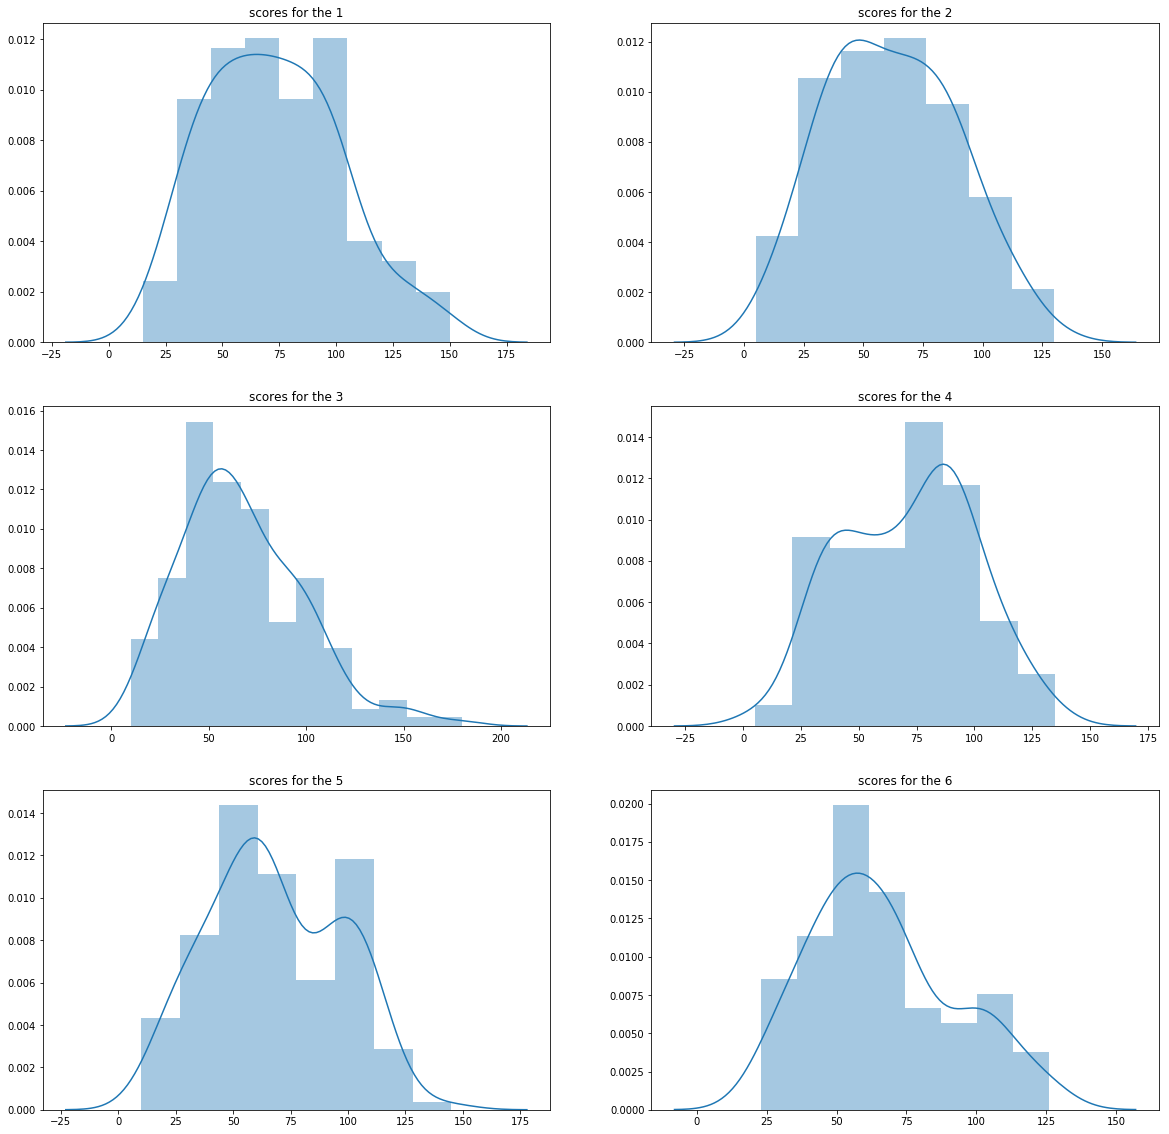

In [56]:
fig, axes = plt.subplots(3,2)
fig.set_size_inches((20,20))
find_dis(Pokemon.Generation, 2, ability[5])

From the 6 abilities distribtion for differed generations, most are symmetric. Generation 2 and gen 3 are similar, which are quite normal. Also, gen 5 and 6 has simialr distribution in most abilities, but bnth of them has a drop in the middle fo the total score range.
We can find that barplot for generations are in the similar level. Then, we can conclude that Pokémon team did make some changes to the distribuion, but hasn't been changed yearly. Lastly, they may find distribution with a middle drop is quite important. Such as ability[5] = Speed, it seems they have kept the same distributino from gen 4 to gen 6, with the distribution with middle drop. But in other abilities, the distributions indicate there is no drop in the middle.